In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/train10/Training',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/test10/Test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')


Mounted at /content/drive
Found 35755 images belonging to 70 classes.
Found 11990 images belonging to 70 classes.


In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0,2))
model.add(Dense(70,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 64,
                  epochs=10,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
model.save('model_fruit70.h5')

In [4]:
from tensorflow.keras.models import load_model
model=load_model('model_fruit70.h5')

In [2]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from google.colab import files 
uploadfile=files.upload()

In [3]:
fruit = ['Apple Braeburn','Grape Pink','Hazelnut','Kaki','Kiwi','Kohlrabi','Kumquats','Lemon Meyer',
         'Limes','Lychee','Mandarine','Mango Red','Mangostan','Maracuja','Melon Piel de Sapo','Mulberry',
         'Nectarine','Nectarine Flat','Nut Forest','Nut Pecan','Onion Red','Onion Red Peeled','Onion White',
         'Orange','Papaya','Passion Fruit','Peach','Peach Flat','Pear','Pear Abate','Pear Forelle','Pear Kaiser',
         'Pear Monster','Pear Red','Pear Stone','Pear Williams','Pepino','Pepper Green','Pepper Orange','Pepper Red',
         'Pepper Yellow','Physalis','Physalis with Husk','Pineapple','Pineapple Mini','Pitahaya Red','Plum',
         'Pomegranate','Pomelo Sweetie','Potato Red','Potato Red Washed','Potato Sweet','Potato White',
         'Quince','Rambutan','Raspberry','Redcurrant','Salak','Strawberry','Strawberry Wedge','Tamarillo',
         'Tangelo','Tomato 1','Tomato Cherry Red','Tomato Heart','Tomato Maroon','Tomato not Ripened',
         'Tomato Yellow','Walnut','Watermelon']

Saving images.jgp.jfif to images.jgp (1).jfif
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  Melon Piel de Sapo


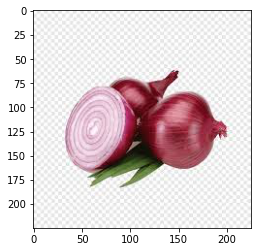

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from google.colab import files 
%matplotlib inline
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(256,256))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', fruit[np.argmax(y_predict)])